In [118]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [119]:
import os
os.chdir('/content/drive/MyDrive/GSS')

**0. Đọc dữ liệu và xem thông tin thống kê**

In [120]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from matplotlib import pyplot as plt

In [121]:
gss = pd.read_csv('gss.csv')
gss

,YEAR,WRKSTAT,MARITAL,AGEWED,CHILDS,AGE,EDUC,PAEDUC,MAEDUC,DEGREE,...,ALIKE3,ALIKE4,ALIKE5,ALIKE6,ALIKE7,ALIKE8,AGEWEDCR,HAPUNHAP,REALINC,WORDSUM
0,1972,1,5,NaN,0.0,23.0,16.0,10.0,NaN,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18951.0,NaN
1,1972,5,1,21.0,5.0,70.0,10.0,8.0,8.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24366.0,NaN
2,1972,2,1,20.0,4.0,48.0,12.0,8.0,8.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24366.0,NaN
3,1972,1,1,24.0,0.0,27.0,17.0,16.0,12.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30458.0,NaN
4,1972,7,1,22.0,2.0,61.0,12.0,8.0,8.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50763.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38111,1998,1,1,NaN,2.0,73.0,14.0,8.0,12.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0
38112,1998,1,3,NaN,0.0,40.0,12.0,12.0,12.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
38113,1998,5,1,NaN,0.0,73.0,6.0,4.0,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
38114,1998,1,5,NaN,0.0,47.0,12.0,12.0,12.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN


Kiểm tra các cột ta quan tâm xem có chứa giá trị null hay không

In [122]:
print('number of null row:')
print('- year: ',gss['YEAR'].isna().sum())
print('- age: ',gss['AGE'].isna().sum())
print('- female: ',gss['FEMALE'].isna().sum())
print('- degree: ',gss['DEGREE'].isna().sum())

number of null row:
- year:  0
- age:  135
- female:  0
- degree:  137


Như vậy cột AGE và cột DEGREE có các dòng null. Ta lọc dữ liệu theo điều kiện đề bài cho và loại bỏ các dòng có DEGREE=null

In [123]:
dat = gss[(gss['YEAR']>=1990)&(gss['AGE']==40)&(gss['FEMALE']==1)&(gss['DEGREE'].notna())]
dat[['YEAR', 'AGE', 'FEMALE', 'DEGREE']].describe()

,YEAR,AGE,FEMALE,DEGREE
count,155.000000,155.0,155.0,155.000000
mean,1994.374194,40.0,1.0,1.645161
std,2.609046,0.0,0.0,1.160732
min,1990.000000,40.0,1.0,0.000000
25%,1993.000000,40.0,1.0,1.000000
50%,1994.000000,40.0,1.0,1.000000
75%,1996.000000,40.0,1.0,3.000000
max,1998.000000,40.0,1.0,4.000000


Thống kê 1 số thông tin trên 2 tập con:
- Tập A1: DEGREE<3
- Tập A2: DEGREE>=3

In [124]:
A1= dat[dat['DEGREE']<3]
A1[['CHILDS']].describe()

,CHILDS
count,111.000000
mean,1.954955
std,1.377662
min,0.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,6.000000


In [125]:
A2= dat[dat['DEGREE']>=3]
A2[['CHILDS']].describe()

,CHILDS
count,44.000000
mean,1.500000
std,1.171364
min,0.000000
25%,0.750000
50%,1.500000
75%,2.000000
max,4.000000


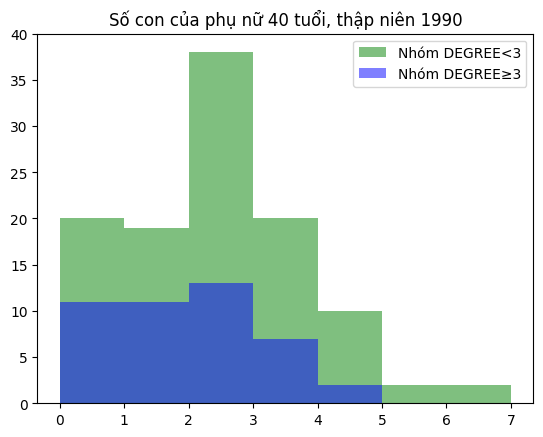

In [126]:
# fig, ax = plt.subplots(1, 2, figsize =(15, 7))

x = np.arange(0, 10, 1)

plt.hist(np.array(A1[['CHILDS']]), bins = [0, 1, 2, 3, 4, 5, 6, 7], color="g", alpha=0.5, label="Nhóm DEGREE<3")
plt.hist(np.array(A2[['CHILDS']]), bins = [0, 1, 2, 3, 4, 5, 6, 7], color="b", alpha=0.5, label="Nhóm DEGREE≥3")
plt.legend()
plt.ylim([0, 40])
plt.title("Số con của phụ nữ 40 tuổi, thập niên 1990")
plt.show()

<ipython-input-127-48c5bf80f6d2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d1['label']='DEGREE<3'
<ipython-input-127-48c5bf80f6d2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2['label']='DEGREE≥3'


<Axes: title={'center': 'CHILDS'}, xlabel='[label]'>

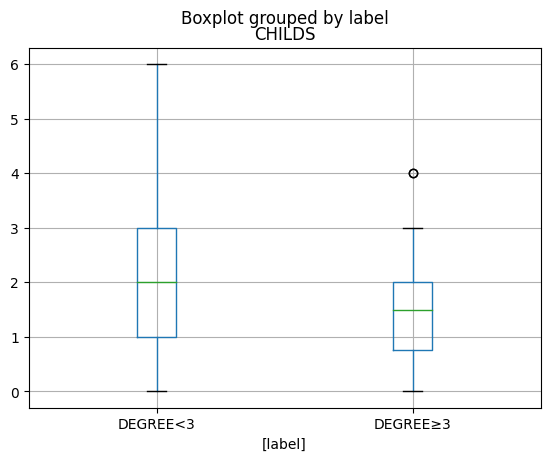

In [127]:
d1 = A1[['CHILDS']]
d1['label']='DEGREE<3'

d2 = A2[['CHILDS']]
d2['label']='DEGREE≥3'

list_d = [d1, d2]
df_d = pd.concat(list_d)
# df_d

df_d.boxplot(by="label")

**1. Likelihood**

các thông tin thống kê để đưa vào likelihood

In [128]:
n1= dat[dat['DEGREE']<3]['CHILDS'].count()
n2= dat[dat['DEGREE']>=3]['CHILDS'].count()
print('n1 trên A1:', n1)
print('n2 trên A2:', n2)

sum1= dat[dat['DEGREE']<3]['CHILDS'].sum()
sum2= dat[dat['DEGREE']>=3]['CHILDS'].sum()
print('\nsum1 trên A1:', sum1)
print('sum2 trên A2:', sum2)

mean1= dat[dat['DEGREE']<3]['CHILDS'].mean()
mean2= dat[dat['DEGREE']>=3]['CHILDS'].mean()
print('\nmean1 trên A1:', mean1)
print('mean2 trên A2:', mean2)

s1= dat[dat['DEGREE']<3]['CHILDS'].var()
s2= dat[dat['DEGREE']>=3]['CHILDS'].var()
print('\ns1 trên A1:', s1)
print('s2 trên A2:', s2)

n1 trên A1: 111
n2 trên A2: 44

sum1 trên A1: 217.0
sum2 trên A2: 66.0

mean1 trên A1: 1.954954954954955
mean2 trên A2: 1.5

s1 trên A1: 1.8979524979524975
s2 trên A2: 1.372093023255814


**2. Vẽ phân phối hậu nghiệm tìm được trong trường hợp tiên nghiệm có phân phối đều**

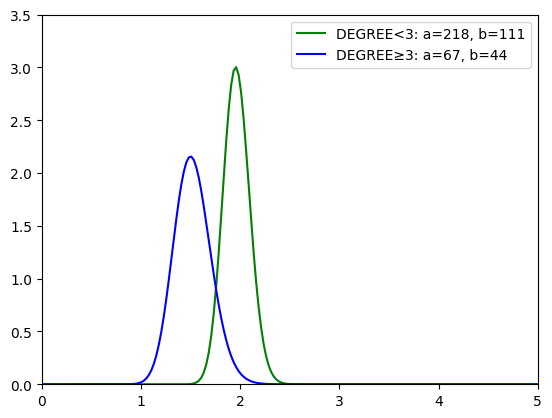

In [129]:


x = np.linspace (0, 5, 200)
y1 = stats.gamma.pdf(x, a=218, scale=1/111)
y2 = stats.gamma.pdf(x, a=67, scale=1/44)

plt.plot(x, y1, "g-", label=("DEGREE<3: a=218, b=111"))
plt.plot(x, y2, "b-", label=("DEGREE≥3: a=67, b=44"))

plt.legend()

# print(stats.gamma.pdf(1.5, a=67, scale=1/44))

plt.ylim([0,3.5])
plt.xlim([0,5])
plt.show()

**4. Ước lượng tỷ lệ sinh của 2 nhóm phụ nữ**

Tính thông tin tiên nghiệm từ tập old_sample. Dùng kết quả tiên nghiệm và tập sample để tính thông tin hậu nghiệm

In [130]:
from sklearn.model_selection import train_test_split

A1= dat[dat['DEGREE']<3]['CHILDS']
A2= dat[dat['DEGREE']>=3]['CHILDS']

# old_sample de lay thong tin tien nghiem
# sample de lay thong tin hau nghiem
a1_old_sample, a1_sample = train_test_split(A1, test_size=0.8, random_state=0)

a1_old_sample_mean = a1_old_sample.mean()
a1_old_sample_var = a1_old_sample.var()

# dung cong thuc mean, var cua Gamma de tinh tham so tien nghiem
a1_prior_beta = a1_old_sample_mean/a1_old_sample_var
a1_prior_alpha = a1_prior_beta * a1_old_sample_mean

# cap nhat alpha, beta qua cac gia tri sample
a1_sample_n = a1_sample.count()
a1_alpha = [a1_prior_alpha]
a1_beta = [a1_prior_beta]
for i in range(a1_sample_n):
    a1_alpha.append(a1_alpha[-1] + list(a1_sample)[i])
    a1_beta.append(a1_beta[-1] + 1)

a1_lambda = a1_alpha[-1] / a1_beta[-1]

print('a1_alpha = ', a1_alpha[-1])
print('a1_beta = ', a1_beta[-1])
print('a1_lambda = ',a1_lambda)

a1_alpha =  175.70857168001407
a1_beta =  89.87415295256534
a1_lambda =  1.9550512122517725


In [131]:
a2_old_sample, a2_sample = train_test_split(A2, test_size=0.8, random_state=0)

a2_old_sample_mean = a2_old_sample.mean()
a2_old_sample_var = a2_old_sample.var()

# dung cong thuc mean, var cua Gamma de tinh tham so tien nghiem
a2_prior_beta = a2_old_sample_mean/a2_old_sample_var
a2_prior_alpha = a2_prior_beta * a2_old_sample_mean

# cap nhat alpha, beta qua cac gia tri sample
a2_sample_n = a2_sample.count()
a2_alpha = [a2_prior_alpha]
a2_beta = [a2_prior_beta]
for i in range(a2_sample_n):
    a2_alpha.append(a2_alpha[-1] + list(a2_sample)[i])
    a2_beta.append(a2_beta[-1] + 1)

a2_lambda = a2_alpha[-1] / a2_beta[-1]

print('a2_alpha = ', a2_alpha[-1])
print('a2_beta = ', a2_beta[-1])
print('a2_lambda = ',a2_lambda)

a2_alpha =  53.58796296296296
a2_beta =  36.907407407407405
a2_lambda =  1.4519568489713999


Vẽ 2 phân phối gamma vừa tìm được

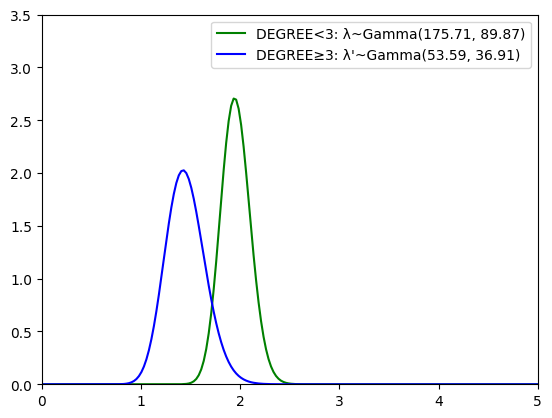

In [ ]:
x = np.linspace (0, 5, 200)
y1 = stats.gamma.pdf(x, a=175.71, scale=1/89.87)
y2 = stats.gamma.pdf(x, a=53.59, scale=1/36.91)


plt.plot(x, y1, "g-", label=("DEGREE<3: λ~Gamma(175.71, 89.87)"))
plt.plot(x, y2, "b-", label=("DEGREE≥3: λ'~Gamma(53.59, 36.91)"))

plt.legend()

plt.ylim([0,3.5])
plt.xlim([0,5])
plt.show()

So sánh phân phối tìm được của số con sinh ra và mẫu trên 2 tập A1, A2

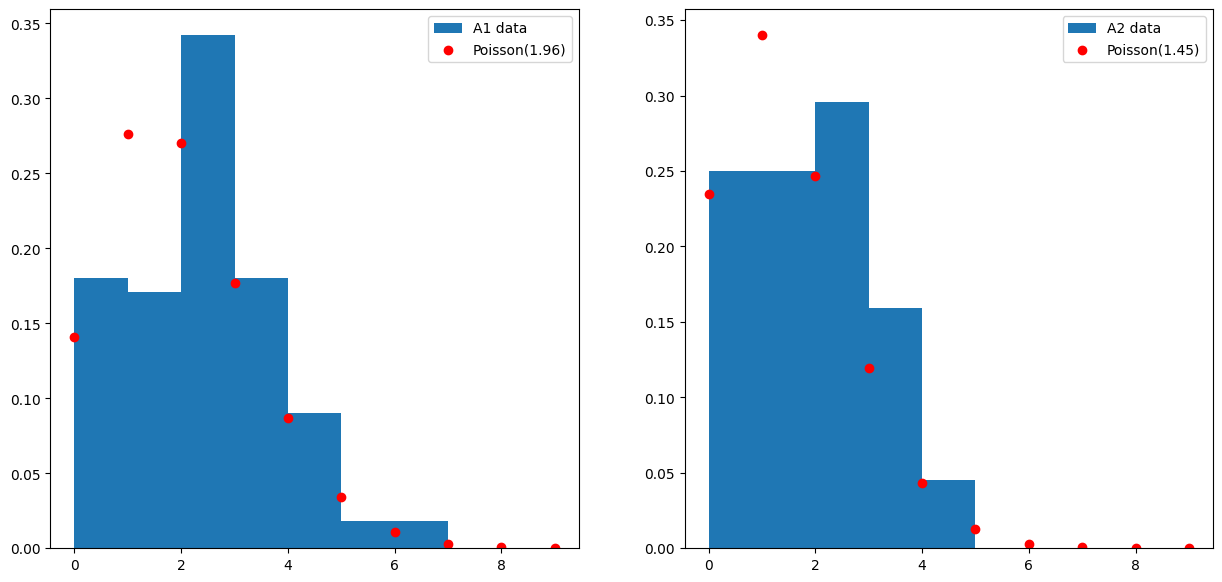

In [ ]:
fig, ax = plt.subplots(1, 2, figsize =(15, 7))

x = np.arange(0, 10, 1)
y3 = stats.poisson.pmf(x, mu=1.96, loc=0)

ax[0].hist(np.array(A1), bins = [0, 1, 2, 3, 4, 5, 6, 7], density=True, label="A1 data")
ax[0].scatter(x, y3, color="red", label="Poisson(1.96)")
ax[0].legend()

x = np.arange(0, 10, 1)
y4 = stats.poisson.pmf(x, mu=1.45, loc=0)

ax[1].hist(np.array(A2), bins = [0, 1, 2, 3, 4, 5, 6, 7], density=True, label="A2 data")
ax[1].scatter(x, y4, color="red", label="Poisson(1.45)")
ax[1].legend()

plt.show()

hình ảnh quá trình hội tụ của E(λ) và E(λ')

Text(0.5, 1.0, "E(λ') của nhóm DEGREE≥3")

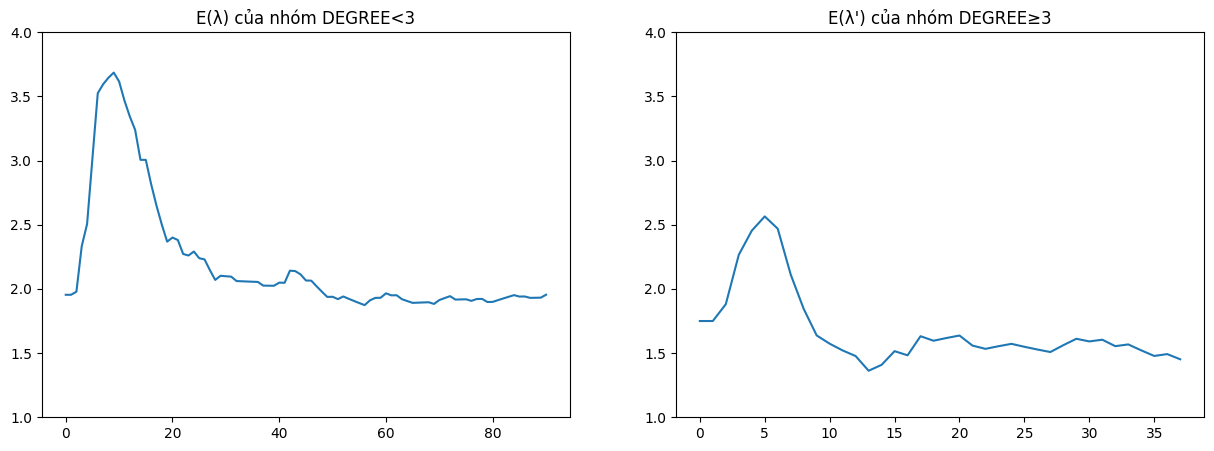

In [142]:
fig, ax = plt.subplots(1, 2, figsize =(15, 5))

e1 = [a1_old_sample_mean]
e2 = [a2_old_sample_mean]

for i in range(len(a1_alpha)):
    e1.append(a1_alpha[i]/a1_beta[i])

for i in range(len(a2_alpha)):
    e2.append(a2_alpha[i]/a2_beta[i])

ax[0].plot(e1)
ax[0].axis(ymin=1, ymax=4)
ax[0].set_title("E(λ) của nhóm DEGREE<3")

ax[1].plot(e2)
ax[1].axis(ymin=1, ymax=4)
ax[1].set_title("E(λ') của nhóm DEGREE≥3")

**5. Tính test thống kê để kiểm định**

In [ ]:
import math
T=(mean1-mean2)/math.sqrt(s1*s1/n1 + s2*s2/n2)
print(T)

1.6586120233155732
